K-NN Metrics:
Accuracy: 0.9487
Precision: 0.9412
Recall: 1.0000
F1: 0.9697

Decision Tree Metrics:
Accuracy: 0.9231
Precision: 0.9394
Recall: 0.9688
F1: 0.9538

Random Forest Metrics:
Accuracy: 0.9487
Precision: 0.9412
Recall: 1.0000
F1: 0.9697

SVM Metrics:
Accuracy: 0.8974
Precision: 0.8889
Recall: 1.0000
F1: 0.9412



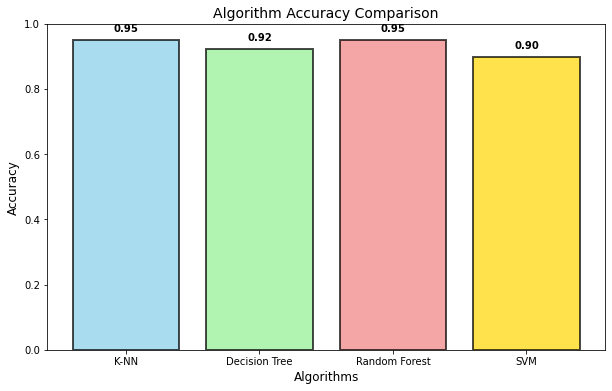

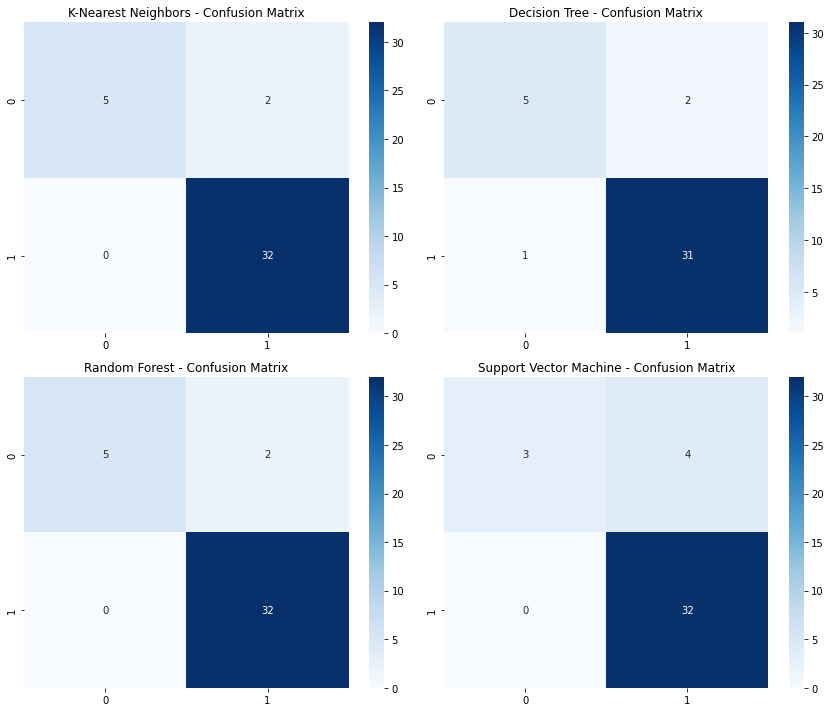

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\karis\Downloads\parkinsons (1).data'
df = pd.read_csv(file_path)

# Exclude the first column (assuming it's an identifier)
df = df.drop(df.columns[0], axis=1)

# Separate features (X) and target variable (y)
X = df.drop('status', axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Function to train and evaluate a classifier and calculate precision, recall, f1, and accuracy
def train_and_evaluate_classifier_metrics(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, confusion_mat

# K-Nearest Neighbors
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_confusion = train_and_evaluate_classifier_metrics(knn_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Decision Tree
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_confusion = train_and_evaluate_classifier_metrics(dt_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_confusion = train_and_evaluate_classifier_metrics(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Support Vector Machine (SVM)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_confusion = train_and_evaluate_classifier_metrics(svm_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Display metrics for each algorithm
algorithm_metrics = {
    'K-NN': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1': knn_f1},
    'Decision Tree': {'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'F1': dt_f1},
    'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1': rf_f1},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1': svm_f1}
}

# Print metrics
for algorithm, metrics in algorithm_metrics.items():
    print(f'{algorithm} Metrics:')
    print(f'Accuracy: {metrics["Accuracy"]:.4f}')
    print(f'Precision: {metrics["Precision"]:.4f}')
    print(f'Recall: {metrics["Recall"]:.4f}')
    print(f'F1: {metrics["F1"]:.4f}')
    print()

# Visualize accuracy using a creative bar chart
algorithms = list(algorithm_metrics.keys())
accuracies = [metrics['Accuracy'] for metrics in algorithm_metrics.values()]

plt.figure(figsize=(10, 6))
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
plt.bar(algorithms, accuracies, color=bar_colors, edgecolor='black', linewidth=2, alpha=0.7)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Algorithm Accuracy Comparison', fontsize=14)
plt.ylim(0, 1.0)

# Add some creativity: annotate each bar with its accuracy value
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

# Visualize Confusion Matrix for each algorithm using seaborn's heatmap
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# K-Nearest Neighbors
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('K-Nearest Neighbors - Confusion Matrix')

# Decision Tree
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree - Confusion Matrix')

# Random Forest
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Random Forest - Confusion Matrix')

# Support Vector Machine (SVM)
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', ax=axs[1, 1])
axs[1, 1].set_title('Support Vector Machine - Confusion Matrix')

# Adjust layout
plt.tight_layout()
plt.show()
